In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor 

plt.style.use('fivethirtyeight')

!pwd

/home/nicovaz/Desktop/Galvanize/capstone/Grit_study_EDA


In [2]:
df = pd.read_csv("./Grit_data/data.csv", sep="\t") 

In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4270 entries, 0 to 4269
Data columns (total 98 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          4226 non-null   object
 1   surveyelapse     4270 non-null   int64 
 2   GS1              4270 non-null   int64 
 3   GS2              4270 non-null   int64 
 4   GS3              4270 non-null   int64 
 5   GS4              4270 non-null   int64 
 6   GS5              4270 non-null   int64 
 7   GS6              4270 non-null   int64 
 8   GS7              4270 non-null   int64 
 9   GS8              4270 non-null   int64 
 10  GS9              4270 non-null   int64 
 11  GS10             4270 non-null   int64 
 12  GS11             4270 non-null   int64 
 13  GS12             4270 non-null   int64 
 14  VCL1             4270 non-null   int64 
 15  VCL2             4270 non-null   int64 
 16  VCL3             4270 non-null   int64 
 17  VCL4             4270 non-null   

### 62 items, 13 item vocabulary checklist, ~20 demographic variables

This dataset has around 4720 observations in it with 98 columns and it is a mix between categorical and numerical values. How different are high grit individuals in dealing with failure than low grit individuals? If someone is low grit what metric leads to that low grit the most? What metric predicts high grit the most? Does getting married effect grit at all? Does being lefty effect grit? Does relligon correlate with grit?

BONUS - Often the most interesting studies come from combining multiple sources of information. If you can scrape multiple websites, your datasets will be even more impressive




# What Im working on for OLS 

predicting grit from education level.

predicting grit from time taking test.


1. check if scores are normal from fives most individual traits looked normal exept for neuroticism which was skewed. I then tested for normailty of all the scores sepratly and got that it was not normal. so then I wanted to know why it was not normal and I checked for skewness and it was really skewed. I went back to the IPIP offial website and saw I was scoring the test incorrectly. So once I wrote the simple code to negate some of the questions from the total for each section I was back on track. 
2. Setting up linear regression model for predicting grit score vs big five traits
3. found r^2 is low only 7% of proportion of variance explained by model.
4. Then I did dummy variables for education level. 



## Inferential linear regression- aka predicting from model

- 5 assumptions needed to do inferential linear regression
    1. Normal
        1. d'agustin and pearson normal test. stats.normaltest(df or arr). look for high p value. low p value fails Ho which is p < a. 

    2. Linear
    3. outliers 
    4. homosecdatisy - variance stays constant
    5. Multicollinearily - the independent variables are not highly correlated with each other
        1. the Variance inflation factor is how you test for this if you need to. VIF
        2. you should remove the biggest VIF and then test again to see if  they lower
        below 10.
    6. 

    - Confounding in Regression.
        - Always graph so you can see if you are making a mistake
        - remember that corelation does not imply causation but only assosiation.
        - ex:

In [4]:
df.head()
# looked for null values and found 44 in the country column. 
df = df[df['country'].notnull()]


In [5]:
def get_fives(df,types):
    cols = []
    q = types
    for (colName, colData) in df.iteritems():
        if str(colName[0]) in q:
            cols.append(colName)
    df2 = df[cols].copy()
    df2["Total"] = df2.sum(axis=1)
    return df2
fives_df = get_fives(df,'ENACO')


def get_extra(df):
    cols = []
    for (colName, colData) in df.iteritems():
        if str(colName).isalpha():
            cols.append(colName)
    return df[cols]
info_df = get_extra(df)
info_df.head()



,country,surveyelapse,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize,operatingsystem,browser,screenw,screenh,introelapse,testelapse
0,RO,174,4,3,2,2,28,1,1,1,4,1,1,2,Windows,Chrome,1366,768,69590,307
1,US,120,2,3,2,1,19,1,6,1,4,2,1,3,Macintosh,Chrome,1280,800,33657,134
2,US,99,1,2,2,2,16,1,0,1,1,2,1,3,Windows,Firefox,1920,1080,95550,138
3,KE,5098,3,2,2,1,30,1,6,1,3,1,1,6,Windows,Chrome,1600,900,4,4440
4,JP,340,4,2,1,2,38,1,2,1,1,2,2,3,Windows,Firefox,1920,1080,3,337


In [6]:
gs_df = get_fives(df ,'GS')
gs_df.info()
gs_df.head()
gs_df_scored = gs_df['Total']/12
gs_df_scored.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4226 entries, 0 to 4269
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   GS1     4226 non-null   int64
 1   GS2     4226 non-null   int64
 2   GS3     4226 non-null   int64
 3   GS4     4226 non-null   int64
 4   GS5     4226 non-null   int64
 5   GS6     4226 non-null   int64
 6   GS7     4226 non-null   int64
 7   GS8     4226 non-null   int64
 8   GS9     4226 non-null   int64
 9   GS10    4226 non-null   int64
 10  GS11    4226 non-null   int64
 11  GS12    4226 non-null   int64
 12  Total   4226 non-null   int64
dtypes: int64(13)
memory usage: 462.2 KB


0    2.333333
1    2.250000
2    3.250000
3    2.500000
4    2.750000
Name: Total, dtype: float64

In [7]:
vcl_df = get_fives(df,"V")
vcl_df.head()

,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,Total
0,1,1,1,1,1,0,0,1,0,1,0,0,0,1,1,1,10
1,1,1,0,1,1,1,0,1,0,1,0,0,1,1,1,1,11
2,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,11
3,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,8
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,4


In [8]:
# validity using the vocab words that dont exist
vcl_df[vcl_df['VCL6'] == 1]
vcl_df[vcl_df['VCL9'] == 1]
vcl_df[vcl_df['VCL12']== 1]


,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,Total
7,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1,11
28,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
34,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,1,8
58,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,12
65,1,1,1,1,1,1,0,0,0,1,0,1,0,1,1,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,1,9
4262,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,14
4264,0,0,1,0,0,1,1,1,0,0,1,1,0,1,0,0,7
4267,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,14


In [9]:
fives_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4226 entries, 0 to 4269
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   E1      4226 non-null   int64
 1   E2      4226 non-null   int64
 2   E3      4226 non-null   int64
 3   E4      4226 non-null   int64
 4   E5      4226 non-null   int64
 5   E6      4226 non-null   int64
 6   E7      4226 non-null   int64
 7   E8      4226 non-null   int64
 8   E9      4226 non-null   int64
 9   E10     4226 non-null   int64
 10  N1      4226 non-null   int64
 11  N2      4226 non-null   int64
 12  N3      4226 non-null   int64
 13  N4      4226 non-null   int64
 14  N5      4226 non-null   int64
 15  N6      4226 non-null   int64
 16  N7      4226 non-null   int64
 17  N8      4226 non-null   int64
 18  N9      4226 non-null   int64
 19  N10     4226 non-null   int64
 20  A1      4226 non-null   int64
 21  A2      4226 non-null   int64
 22  A3      4226 non-null   int64
 23  A4      4226 

In [10]:
fives_df.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O2,O3,O4,O5,O6,O7,O8,O9,O10,Total
0,2,2,3,4,5,1,2,4,4,4,...,2,4,1,4,2,5,4,5,4,156
1,4,2,5,3,5,2,4,2,5,4,...,2,5,2,4,1,4,3,4,5,176
2,1,5,2,4,3,2,1,5,2,5,...,2,4,2,4,3,5,5,4,4,165
3,3,5,2,4,3,4,3,5,1,5,...,2,3,2,4,1,4,2,5,4,153
4,1,5,1,5,2,5,1,5,1,4,...,3,2,2,3,3,4,1,3,2,140


In [11]:
pos_questions = [ 
    'E1','E3','E5','E7','E9',                       # 5
    'N1','N3','N5','N6','N7','N8','N9','N10', # 8
    'A2','A4','A6','A8','A9','A10',               # 6
    'C1','C3','C5','C7','C9','C10',               # 6
    'O1','O3','O5','O7','O8','O9','O10',        # 7
]

neg_questions = [ 
    'E2','E4','E6','E8','E10', # 5
    'N2','N4',                       # 2
    'A1','A3','A5','A7',         # 4
    'C2','C4','C6','C8',         # 4
    'O2','O4','O6',                # 3
]

In [12]:
fives_scored = fives_df.drop('Total', axis =1)

fives_scored[pos_questions] = fives_df[pos_questions].replace({1:-2, 2:-1, 3:0, 4:1, 5:2})
fives_scored[neg_questions] = fives_df[neg_questions].replace({1:2, 2:1, 3:0, 4:-1, 5:-2})

In [13]:
fives_scored.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,-1,1,0,-1,2,2,-1,-1,1,-1,...,2,1,1,2,1,1,2,1,2,1
1,1,1,2,0,2,1,1,1,2,-1,...,1,1,2,1,1,2,1,0,1,2
2,-2,-2,-1,-1,0,1,-2,-2,-1,-2,...,1,1,1,1,1,0,2,2,1,1
3,0,-2,-1,-1,0,-1,0,-2,-2,-2,...,2,1,0,1,1,2,1,-1,2,1
4,-2,-2,-2,-2,-1,-2,-2,-2,-2,-1,...,2,0,-1,1,0,0,1,-2,0,-1


In [14]:
Extroversion_df = get_fives(fives_scored,'E')

In [15]:
Neuroticism_df = get_fives(fives_scored,"N")
Neuroticism_df.head()


,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,Total
0,-1,0,1,1,0,-1,0,0,-1,1,0
1,2,1,2,0,0,1,2,2,2,0,12
2,1,0,1,0,1,1,1,0,1,-1,5
3,-2,-2,0,0,-1,0,-2,-2,-1,-2,-12
4,1,2,2,0,2,1,-2,-2,1,0,5


In [16]:
Agreeableness_df= get_fives(fives_scored,"A")
Agreeableness_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Total
0,2,2,1,2,2,1,1,1,1,0,13
1,-2,1,2,1,1,2,2,1,0,1,9
2,0,0,2,0,0,1,-1,1,0,0,3
3,2,1,2,2,-1,2,1,2,2,1,14
4,1,0,1,0,1,0,1,-1,-1,1,3


In [17]:
Conscientiousness_df = get_fives(fives_scored,"C")
Conscientiousness_df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Total
0,-1,-1,1,0,-1,-1,0,1,-1,1,-2
1,1,0,1,0,-2,0,2,1,2,0,5
2,-1,1,1,1,0,-1,2,0,0,1,4
3,1,2,2,2,1,2,1,2,1,0,14
4,0,2,0,2,1,1,0,1,0,1,8


In [18]:
Openness_df = get_fives(fives_scored,"O")
Openness_df.head()

,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,Total
0,2,1,1,2,1,1,2,1,2,1,14
1,1,1,2,1,1,2,1,0,1,2,12
2,1,1,1,1,1,0,2,2,1,1,11
3,2,1,0,1,1,2,1,-1,2,1,10
4,2,0,-1,1,0,0,1,-2,0,-1,0


In [19]:
types_labels = ['Extroversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']

In [20]:
def vis_fives_type(df,columns_of_questions, xlim=-25, ylim=25, col='Total',bins_=15):
    fig, axs = plt.subplots()

    axs.hist(df[col], bins=bins_)
    axs.set_title(columns_of_questions)
    axs.set_xlabel('Score')
    axs.set_ylabel('Count')
    axs.set_xlim(xlim,ylim);


# vis_fives_type(Openness_df,"IPIP Openness Score",bins_=15)
# vis_fives_type(Extroversion_df,"IPIP Extroversion Score")
# vis_fives_type(Agreeableness_df, "IPIP Agreeableness Score")
# vis_fives_type(Conscientiousness_df, "IPIP Conscientiousness Score")
# vis_fives_type(Neuroticism_df, "IPIP Neuroticism Score")
# vis_fives_type(fives_scored.sum(axis=1), "All Questions", xlim=-20, ylim=100)

In [21]:
#sns.heatmap(totals_df)


totals_df = (pd.DataFrame({"Openness":Openness_df['Total'],
                           "Neuroticism": Neuroticism_df["Total"],
                           "Conscientiousness":Conscientiousness_df["Total"],
                          "Extroversion": Extroversion_df['Total'],
                          "Agreeableness": Agreeableness_df['Total']}))
#grab_totals([Openness_df,Extroversion_df, Neuroticism_df,Conscientiousness_df,Agreeableness_df])

In [22]:
totals_df.head()


,Openness,Neuroticism,Conscientiousness,Extroversion,Agreeableness
0,14,0,-2,1,13
1,12,12,5,10,9
2,11,5,4,-12,3
3,10,-12,14,-11,14
4,0,5,8,-18,3


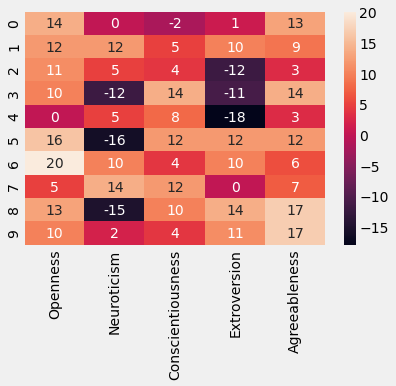

In [23]:
sns.heatmap(totals_df.head(10), annot=True)

In [24]:
totals_df.corr()

,Openness,Neuroticism,Conscientiousness,Extroversion,Agreeableness
Openness,1.000000,-0.103572,0.073269,0.190378,0.138555
Neuroticism,-0.103572,1.000000,-0.237920,-0.251893,-0.106166
Conscientiousness,0.073269,-0.237920,1.000000,0.083123,0.158966
Extroversion,0.190378,-0.251893,0.083123,1.000000,0.299411
Agreeableness,0.138555,-0.106166,0.158966,0.299411,1.000000


The test makers did a good job in making sure that each trait was signficalty differnt from each other to make it so that none of the traits are correlated. 

In [25]:
def info_graph(df,col, colname, bins_=20, xlabel='f', ylabel='f'):
    fig, axs = plt.subplots()

    axs.hist(df[col], bins=bins_)
    axs.set_title(colname)
    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    axs.legend();
    


In [26]:

stats.normaltest(totals_df)

NormaltestResult(statistic=array([124.04441298, 144.09740768,  73.17556711, 242.31166474,
       441.06954017]), pvalue=array([1.15903877e-27, 5.12442916e-32, 1.28862780e-16, 2.41374035e-53,
       1.67096089e-96]))

In [27]:
total_df = totals_df.join(gs_df[['Total']])

In [28]:
total_df.corr()

,Openness,Neuroticism,Conscientiousness,Extroversion,Agreeableness,Total
Openness,1.000000,-0.103572,0.073269,0.190378,0.138555,-0.223544
Neuroticism,-0.103572,1.000000,-0.237920,-0.251893,-0.106166,-0.049514
Conscientiousness,0.073269,-0.237920,1.000000,0.083123,0.158966,0.009826
Extroversion,0.190378,-0.251893,0.083123,1.000000,0.299411,-0.142997
Agreeableness,0.138555,-0.106166,0.158966,0.299411,1.000000,-0.069838
Total,-0.223544,-0.049514,0.009826,-0.142997,-0.069838,1.000000


In [29]:
total_bio = total_df.join(info_df)
total_bio.head()

,Openness,Neuroticism,Conscientiousness,Extroversion,Agreeableness,Total,country,surveyelapse,education,urban,...,race,voted,married,familysize,operatingsystem,browser,screenw,screenh,introelapse,testelapse
0,14,0,-2,1,13,28,RO,174,4,3,...,4,1,1,2,Windows,Chrome,1366,768,69590,307
1,12,12,5,10,9,27,US,120,2,3,...,4,2,1,3,Macintosh,Chrome,1280,800,33657,134
2,11,5,4,-12,3,39,US,99,1,2,...,1,2,1,3,Windows,Firefox,1920,1080,95550,138
3,10,-12,14,-11,14,30,KE,5098,3,2,...,3,1,1,6,Windows,Chrome,1600,900,4,4440
4,0,5,8,-18,3,33,JP,340,4,2,...,1,2,2,3,Windows,Firefox,1920,1080,3,337


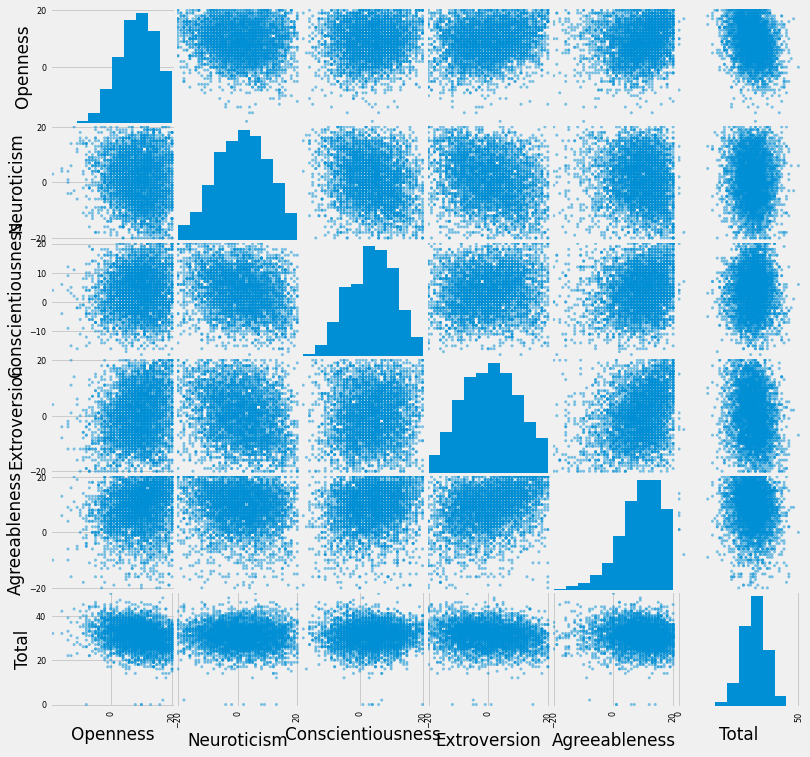

In [30]:
total_bio.drop(['screenh','screenw'], axis = 1)

scatter_matrix(total_df, figsize=(12, 12));

,Openness,Neuroticism,Conscientiousness,Extroversion,Agreeableness,Total,country,surveyelapse,education,urban,...,race,voted,married,familysize,operatingsystem,browser,screenw,screenh,introelapse,testelapse
0,14,0,-2,1,13,28,RO,174,4,3,...,4,1,1,2,Windows,Chrome,1366,768,69590,307
1,12,12,5,10,9,27,US,120,2,3,...,4,2,1,3,Macintosh,Chrome,1280,800,33657,134
2,11,5,4,-12,3,39,US,99,1,2,...,1,2,1,3,Windows,Firefox,1920,1080,95550,138
5,16,-16,12,12,12,31,AU,515,3,3,...,1,2,0,1,Windows,Chrome,1920,1080,2090,554
10,4,-16,8,0,6,36,AE,592,3,1,...,1,1,3,3,Windows,Chrome,1280,1024,726,311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,14,1,11,13,20,28,GB,151,3,1,...,4,2,1,2,Windows,Chrome,1366,768,260,210
4231,11,16,11,-4,2,34,GR,187,3,3,...,4,1,1,2,Windows,Firefox,1920,1080,1564,184
4237,7,-10,7,-9,-5,39,PH,299,1,3,...,1,2,1,4,Windows,Firefox,1366,768,449,176
4239,2,-10,13,3,17,38,US,812,3,3,...,3,1,2,5,Windows,Microsoft Internet Explorer,1093,614,2473,852


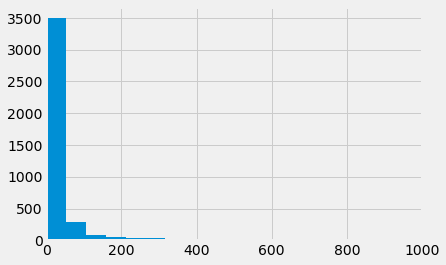

In [31]:
fig, ax = plt.subplots(1,1)

ax.hist(total_bio['introelapse'], bins=4000)
ax.set_xlim(0,1000)

total_bio[total_bio['introelapse'] > 200]


In [32]:
total_bio2 = total_bio[total_bio['surveyelapse'] < 600]
stats.normaltest(total_bio2['surveyelapse'])
# total_bio2 = total_bio[total_bio['introelapse'] < 200]
# total_bio2 = total_bio[total_bio['testelapse'] < 700]




just_dummies = pd.get_dummies(total_bio['education'], drop_first = True)
total_bio2 = total_bio2.join(just_dummies)
total_bio2.head()

total_bio2 = total_bio2[total_bio2["Total"] > 12 ]

In [61]:
y = total_bio2["Total"]
X = total_bio2[['Openness', 'Neuroticism','Conscientiousness', "Extroversion", "Agreeableness",'surveyelapse','age']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     53.24
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           4.27e-73
Time:                        12:34:28   Log-Likelihood:                -12311.
No. Observations:                4088   AIC:                         2.464e+04
Df Residuals:                    4080   BIC:                         2.469e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                31.3064      0.280    111.834      0.000      30.758      31.855
Openness             -0.1677      0.013    -13.258      0.000      -0.193      -0.143
Neuroticism          -0.0559      0.009     -5.921      0.000      -0.074      -0.037
Conscientiousness     0.0104      0.011      0.947      0.344      -0.011       0.032
Extroversion         -0.0742      0.009     -8.107      0.000      -0.092      -0.056
Agreeableness        -0.0170      0.011     -1.515      0.130      -0.039       0.005
surveyelapse          0.0047      0.001      5.543      0.000       0.003       0.006
age                   0.0092      0.006      1.442      0.149      -0.003       0.022
==============================================================================
Omnibus:                       23.213   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.902
Skew:                          -0.149   Prob(JB):                     3.91e-06
Kurtosis:                       3.240   Cond. No.                         837.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'QQ Plot vs Normal dist for Grit Score Residuals')

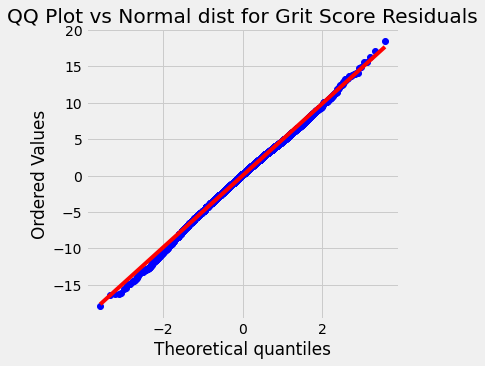

In [34]:
# for the grit using personality traits data
fig, ax = plt.subplots(figsize=((5, 5)))
predictions = results.predict(X)
stats.probplot(total_bio2['Total'] - predictions, plot=ax);
ax.set_title("QQ Plot vs Normal dist for Grit Score Residuals")

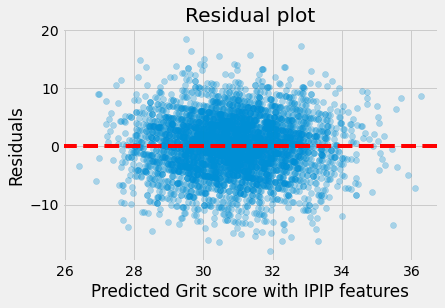

In [48]:
fig, ax = plt.subplots()
predictions = results.predict(X)
ax.scatter(predictions,
           total_bio2["Total"] - predictions,
           alpha=0.3)
ax.axhline(0, color='r', ls='--')
ax.set_title("Residual plot")
ax.set_xlabel('Predicted Grit score with IPIP features')
ax.set_ylabel('Residuals');

In [36]:
x =total_bio2[['Openness', 'Neuroticism','Conscientiousness', "Extroversion", "Agreeableness"]]
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
p_values = pd.DataFrame(results.pvalues)
vif_data["p_values"] = p_values.values[1:]
# p_values.values[1:]
vif_data.head()

,feature,VIF,p_values
0,Openness,1.863151,1.485049e-42
1,Neuroticism,1.114827,2.343294e-10
2,Conscientiousness,1.309796,1.404375e-01
3,Extroversion,1.126529,4.943215e-16
4,Agreeableness,1.980541,1.843794e-01


In [37]:
stats.skewtest(gs_df['Total'])

SkewtestResult(statistic=-10.125983816811209, pvalue=4.2369613123852056e-24)

In [57]:
y2 = total_bio2["Total"]
X2 = total_bio2[['age',"surveyelapse",1,2,3,4]]
X2 = sm.add_constant(X2)
model = sm.OLS(y2, X2)
results2 = model.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     9.831
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           8.69e-11
Time:                        11:29:44   Log-Likelihood:                -12460.
No. Observations:                4088   AIC:                         2.493e+04
Df Residuals:                    4081   BIC:                         2.498e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           29.9888      0.915     32.768      0.000      28.195      31.783
age              0.0084      0.007      1.163      0.245      -0.006       0.023
surveyelapse     0.0063      0.001      7.272      0.000       0.005       0.008
1               -0.6342      0.903     -0.702      0.483      -2.405       1.137
2               -0.4945      0.885     -0.559      0.576      -2.229       1.240
3               -0.8234      0.889     -0.927      0.354      -2.566       0.919
4               -1.0117      0.903     -1.121      0.262      -2.781       0.758
==============================================================================
Omnibus:                       13.367   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.854
Skew:                          -0.115   Prob(JB):                     0.000981
Kurtosis:                       3.169   Cond. No.                     5.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'QQ Plot vs Normal dist for grit Score Residuals')

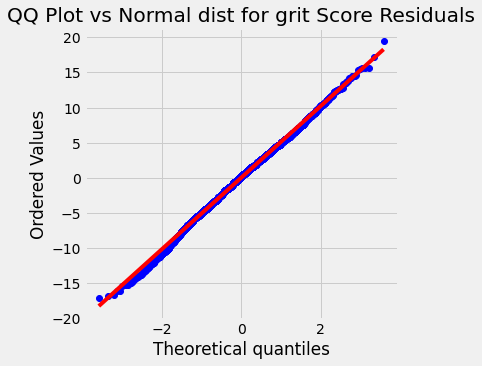

In [52]:
# for the grit using time, age, and education data
fig, ax = plt.subplots(figsize=((5, 5)))
predictions = results2.predict(X2)
stats.probplot(total_bio2["Total"] - predictions, plot=ax);
ax.set_title("QQ Plot vs Normal dist for grit Score Residuals")

In [58]:
x2 = total_bio2[['age',"surveyelapse", 1,2,3,4]]
vif_data = pd.DataFrame()
vif_data["feature"] = x2.columns
vif_data["VIF"] = [variance_inflation_factor(x2.values, i) 
                          for i in range(len(x2.columns))] 
p_values = pd.DataFrame(results2.pvalues)
vif_data["p_values"] = p_values.values[1:]
# p_values.values[1:]
vif_data.head()

,feature,VIF,p_values
0,age,6.302240,2.450474e-01
1,surveyelapse,6.029165,4.229472e-13
2,1,1.946094,4.826065e-01
3,2,4.536335,5.763302e-01
4,3,3.978372,3.542145e-01


In [54]:
# mulitcolaniearity. fit asumpition

In [55]:
y_hat = results.predict(X)
redsiduals = y_hat -y

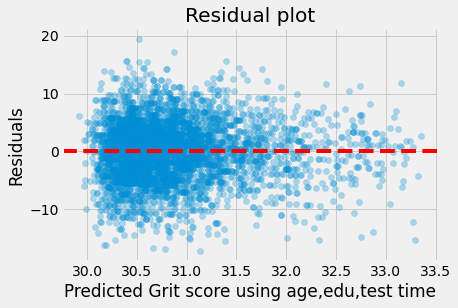

In [56]:
fig, ax = plt.subplots()
predictions = results2.predict(X2)
ax.scatter(predictions,
           total_bio2["Total"] - predictions,
           alpha=0.3)
ax.axhline(0, color='r', ls='--')
ax.set_title('Residual plot')
ax.set_xlabel('Predicted Grit score using age,edu,test time')
ax.set_ylabel('Residuals');